<h1 align="center">Comodín 1: análisis del péndulo simple, un experimento en casa</h1>
<div align="right">Paula Daniela Cárdenas León, 2181289<br>Gessika Gónzalez Santos, 2181565<br>Joan Sebastián Parra Atencio, 2182825<br>Grupo H2a, 2020</div>

[Video explicativo](https://youtu.be/V7ww3QB4nHA)

## Fundamentos físicos:

Un péndulo simple se define como una partícula puntual de masa $m$ suspendido mediante un hilo inextensible de longitud $L$ y fijo respesto a un punto de pivote $P$. Cuando la partícula se desplaza a una amplitud inicial $\theta_0$ (ángulo que forma el hilo con la vertical) y se suelta, el péndulo exhibirá un movimiento oscilatorio y periódico. 

Suponga el siguiente sistema físico: 

![pendulo3.png](attachment:pendulo3.png)

donde se ha asumido fricción nula. Aplicando segunda ley de Newton para sistemas rotacionales, la ecuación de movimiento está dada por 

\begin{equation}
\sum_{i} \tau_i = I\alpha,
\end{equation}
donde se considera la sumatoria de todos los torques que afectan el sistema y adicional $I$ es el momento de inercia y $\alpha$ es la aceleración angular. Considerando una fuerza de rozamiento $F_r=-\mu v_t$, donde $v_t=L\frac{d\theta}{dt}$ es la velocidad tangencial instantanea de la partícula, la anterior ecuación nos lleva a
\begin{equation}
-mgL \sin\theta -\mu L^2 \frac{d\theta}{dt}= mL^2\frac{d^2\theta}{dt^2},
\end{equation}
la cual lleva la ecuación diferencial 
\begin{equation}
\frac{d^2\theta}{dt^2}+2\gamma\frac{d\theta}{dt}+\omega_0 ^2\sin\theta=0,
\end{equation}
donde $\omega_0=\sqrt{\frac{g}{L}}$ es la frecuencia natural de oscilación y $\gamma=\frac{\mu}{2m}$ es la constante de amortiguamento del sistema.
### Caso 1: oscilaciones libres - pequeñas amplitudes



Debido a que se consideran pequeñas amplitudes ($\theta_0\approx 0$), resulta válida la aproximación $\sin\theta\approx \theta$, en tanto que la ecuación diferencial queda de la forma 
\begin{equation}
\frac{d^2\theta}{dt^2}+\omega_0 ^2\theta=0,
\end{equation}

que corresponde a la ecuación diferencial de un oscilador armónico simple con solución

\begin{equation}
\theta(t)=\theta_0 \cos(\omega t+\phi).
\end{equation}

Adicionalmente, el periodo está dado por $T=\frac{1}{2\pi}\sqrt{\frac{L}{g}}$.

### Caso 2: oscilaciones amortiguadas - pequeñas amplitudes

Nuevamente se considera la aproximación a ángulos pequeños $\sin\theta\approx \theta$ llevando a la ecuación diferencial  

\begin{equation}
\frac{d^2\theta}{dt^2}+2\gamma\frac{d\theta}{dt}+\omega_0 ^2\theta=0,
\end{equation}

la cual corresponde a la ecuación diferencial para un oscilador amortiguado y cuya solución está dada por 

\begin{equation}
\theta=\theta_0 e^{-\gamma t}\cos(\Omega t+\phi),
\end{equation}

donde la frecuencia está dada por $\Omega=\sqrt{\omega_0^2 - \gamma ^2}$. Naturalmente la amplitud está modulada por la función envolvente $A=\theta_0 e^{-\gamma t}$. Por otro lado, los casos de amortiguamiento están dados por 
* $\omega_0^2>\gamma^2$ (subamortiguado)
* $\omega_0^2=\gamma^2$ (críticamente amortiguado)
* $\omega_0^2<\gamma^2$ (sobreamortiguado)

### Caso 3: grandes oscilaciones

Una vez se elimina la aproximación a ángulos pequeños la solución para la ecuación diferencial en oscilaciones libres se encuentra en términos de funciones especiales (integrales elípticas de primera especie) y para el caso con fricción no hay solución analítica.  

## Análisis experimental:
Datos

In [1]:
g=9.8 # gravedad en [m/s²]
L=0.9 # Longitud del hilo en [m]
m=0.060 # masa colgante en [kg]

In [2]:
# Aquí se importan las librerías necesarías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Primeros cálculos 
omenat=np.sqrt(g/L)
gamma=0
Omega=np.sqrt(omenat**2 - gamma**2)

In [4]:
#Aquí se define la función que busca los máximos en amplitud y el tiempo en que suceden
def peaks_finder(data):

    t = data['t']
    x = data['angulo']
    x_umbral = np.zeros(len(x))
    x_umbral[x > 0.2*x.max()] = 1

    t_dx = t[1:]
    x_dx = x[1:]
    dx_umbral = np.abs(np.diff(x_umbral))

    index = np.arange(len(t_dx))[dx_umbral>0]
    idx = []
    i0 = index[0]   
    for i in index[1:]:
        idx.append(int((i0+i)/2))
        i0 = i
    
    time = t_dx[idx].to_numpy()
    amp = np.abs(x_dx[idx]).to_numpy()
    
    return [time, amp, x_dx[idx], t_dx, x_dx]

In [5]:
# Aquí se define la función en la que se hace la regresión lineal
def regression(time, amp):
    y = -1*np.log(amp/amp[0]) # Se realizan los cambios de variables
    x = time

    p = np.polyfit(x, y, 1) # Interpolación
    gamma = p[0] # 1/s
    p[1] = 0 # garantiza el cruce por cero

    correlation_matrix = np.corrcoef(y, np.polyval(p, x))
    R = correlation_matrix[0, 1]**2

    x_model2 = np.linspace(min(time), max(time), 10)
    y_model2 = np.polyval(p, x_model2)

    return [x, y, x_model2, y_model2, gamma, R]

In [45]:
# Comando para importar los datos desde excel y manejarlos como un dataframe
# Descargar datos del repositorio
caso = {
    1:'https://raw.githubusercontent.com/davidalejandromiranda/laboratorios-fisica/master/f3/i2_Pendulo_Simple/Caso1.csv',
    2:'https://raw.githubusercontent.com/davidalejandromiranda/laboratorios-fisica/master/f3/i2_Pendulo_Simple/Caso2.csv',
    3:'https://raw.githubusercontent.com/davidalejandromiranda/laboratorios-fisica/master/f3/i2_Pendulo_Simple/Caso3.csv'
}

#### Análisis para pequeñas oscilaciones

In [46]:
data1=pd.read_csv(caso[1], error_bad_lines=False)
data1['angulo']  -= data1['angulo'].mean()
data1

,t,angulo
0,0.0000,0.183456
1,0.0659,0.183456
2,0.0660,0.183424
3,0.1320,0.183071
4,0.1320,0.179087
...,...,...
1522,50.2000,0.066404
1523,50.3000,0.063109
1524,50.3000,0.059528
1525,50.3000,0.055608


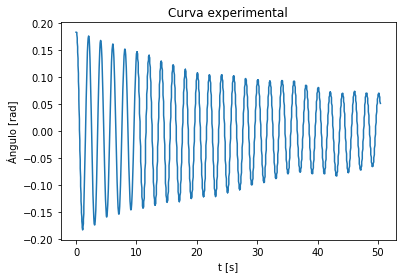

In [47]:
plt.plot(data1.t,data1.angulo) # Aquí se grafican los datos de ángulo vs tiempo importados anteriormente
plt.title('Curva experimental')
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

#### Determinando el coeficiente de atenuación: 

Seleccionamos los datos de las amplitudes máximas positivas y el tiempo en que se obtienen

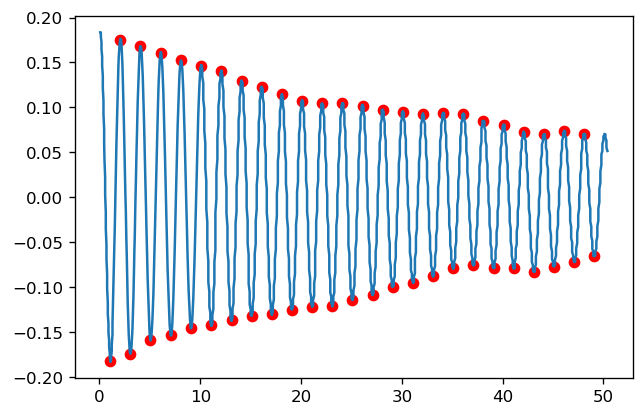

In [48]:
modelo1 = peaks_finder(data1)
plt.figure(dpi=120)
plt.plot(modelo1[0], modelo1[2], 'ro')
plt.plot(modelo1[3], modelo1[4])

####  Linealización de datos

Se linealiza la ecuación que describe el cambio en la amplitud de la oscilación mediante el siguiente cambio de variable:

\begin{equation}
y=-ln\left|\frac{\theta(t)}{\theta_0}\right|,
\end{equation}

\begin{equation}
x=t
\end{equation}

la ecuación de solución será dada por 

\begin{equation}
y=\gamma x
\end{equation}

(para detalles del código ver la función "regression" definida previamente)

In [9]:
linealizacion1 = regression(modelo1[0],modelo1[1])

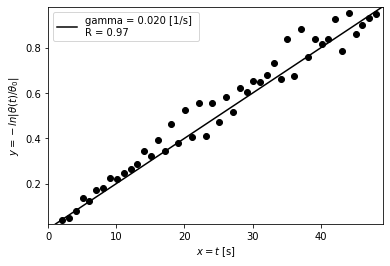

In [10]:
label = 'gamma = %0.3f [1/s] \nR = %0.2f' % (linealizacion1[4], linealizacion1[5])

plt.plot(linealizacion1[0],linealizacion1[1], 'ok')
plt.plot(linealizacion1[2], linealizacion1[3], 'k', label=label)
plt.xlabel(r'$x = t$ [s]')
_ = plt.ylabel(r'$y = - ln\left|\theta(t) / \theta_0\right| $')
plt.legend()
_ = plt.axis([0, max(linealizacion1[2]), min(linealizacion1[3]), max(linealizacion1[3])])
plt.show()

#### Estimación de $\Omega$:
Se realiza mediante la relación con el periodo de las oscilaciones

In [12]:
# Se hace la diferencia entre t[i+1]-t[i] para calcular los periodos y la función mean
# devuelve el promedio de todos estos periodos
T = 2*np.mean(np.diff(modelo1[0]))
Omega1=2*np.pi/T
print(Omega1)

3.140938291445742


#### Curva teórica con los valores obtenidos:

In [13]:
Omega=Omega1
A = max(data1.angulo)
gamma= linealizacion1[4]

tiempo_modelo = np.linspace(min(data1.t), max(data1.t), 2000)
angulo_modelo = A*np.exp(-1*gamma*tiempo_modelo)*np.cos(Omega*tiempo_modelo)

<Figure size 720x480 with 0 Axes>

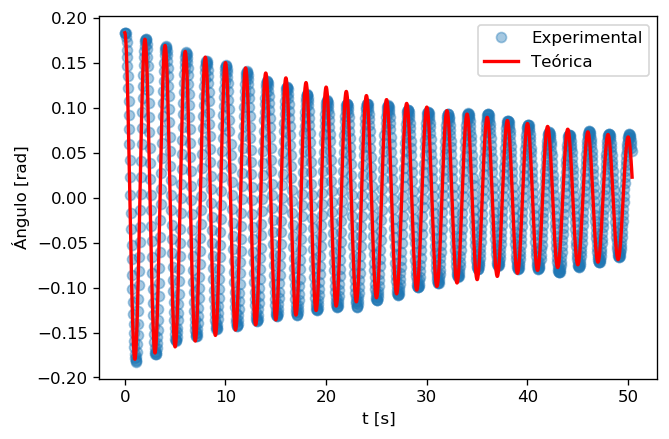

In [14]:
plt.figure(dpi=120)
plt.figure(dpi=120)
plt.plot(data1.t, data1.angulo, 'o', label='Experimental', alpha=0.4)
plt.plot(tiempo_modelo, angulo_modelo,  'r', lw=2, label='Teórica')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

<Figure size 720x480 with 0 Axes>

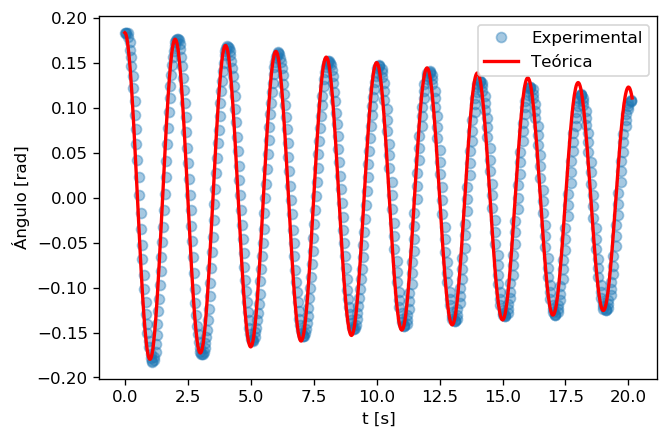

In [15]:
# Aquí se grafican las cuvas teóricas y experimentales simultaneamente cortadas
plt.figure(dpi=120)
plt.figure(dpi=120)
k1 = data1.t < 0.4*data1.t.max()
k2 = tiempo_modelo < 0.4*data1.t.max()
plt.plot(data1.t[k1], data1.angulo[k1], 'o', label='Experimental', alpha=0.4)
plt.plot(tiempo_modelo[k2], angulo_modelo[k2],  'r', lw=2, label='Teórica')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

#### Oscilaciones $\sim 60^{\circ}$

In [17]:
data2=pd.read_csv(caso[2], error_bad_lines=False)
data2['angulo']  -= data2['angulo'].mean()
data2

,t,angulo
0,0.0660,0.970298
1,0.0661,0.968280
2,0.1320,0.961851
3,0.1320,0.947213
4,0.1980,0.923266
...,...,...
811,26.8000,0.122661
812,26.9000,0.100690
813,26.9000,0.078643
814,26.9000,0.055125


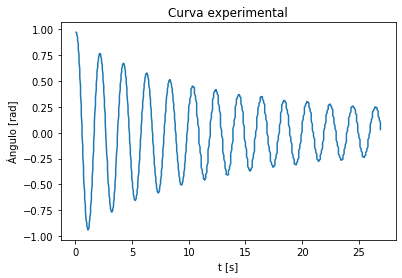

In [18]:
plt.plot(data2.t,data2.angulo)
plt.title('Curva experimental')
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

#### Determinando el coeficiente de atenuación: 

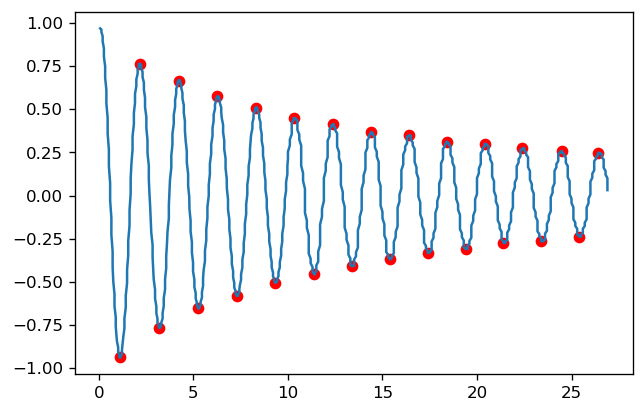

In [28]:
modelo2 = peaks_finder(data2)
plt.figure(dpi=120)
plt.plot(modelo2[0], modelo2[2], 'ro')
plt.plot(modelo2[3], modelo2[4])

#### Linealización de datos

In [29]:
linealizacion2 = regression(modelo2[0],modelo2[1])

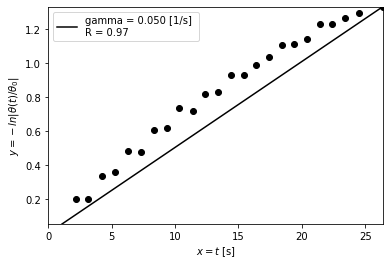

In [21]:
label = 'gamma = %0.3f [1/s] \nR = %0.2f' % (linealizacion2[4], linealizacion2[5])

plt.plot(linealizacion2[0],linealizacion2[1], 'ok')
plt.plot(linealizacion2[2], linealizacion2[3], 'k', label=label)
plt.xlabel(r'$x = t$ [s]')
_ = plt.ylabel(r'$y = - ln\left|\theta(t) / \theta_0\right| $')
plt.legend()
_ = plt.axis([0, max(linealizacion2[2]), min(linealizacion2[3]), max(linealizacion2[3])])
plt.show()

#### Estimación de $\Omega$:


In [30]:
T = 2*np.mean(np.diff(modelo2[0]))
Omega2=2*np.pi/T
print(Omega2)

3.103114039499993


#### Curva teórica con los valores obtenidos: 

In [31]:
Omega=Omega2
A = max(data2.angulo)
gamma= linealizacion2[4]

tiempo_modelo = np.linspace(min(data2.t), max(data2.t), 2000)
angulo_modelo = A*np.exp(-1*gamma*tiempo_modelo)*np.cos(Omega*tiempo_modelo)

<Figure size 720x480 with 0 Axes>

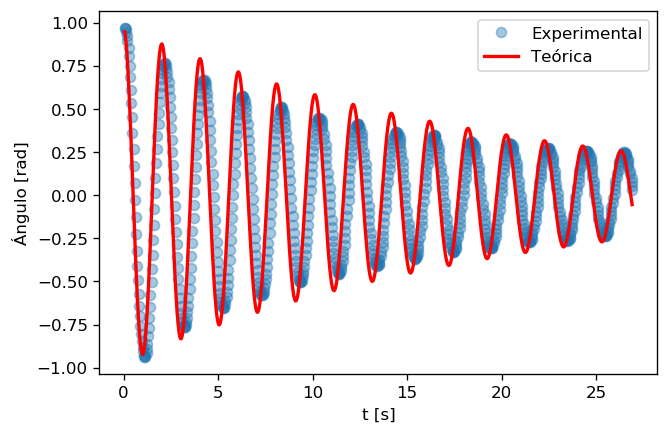

In [32]:
plt.figure(dpi=120)
plt.figure(dpi=120)
plt.plot(data2.t, data2.angulo, 'o', label='Experimental', alpha=0.4)
plt.plot(tiempo_modelo, angulo_modelo,  'r', lw=2, label='Teórica')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

<Figure size 720x480 with 0 Axes>

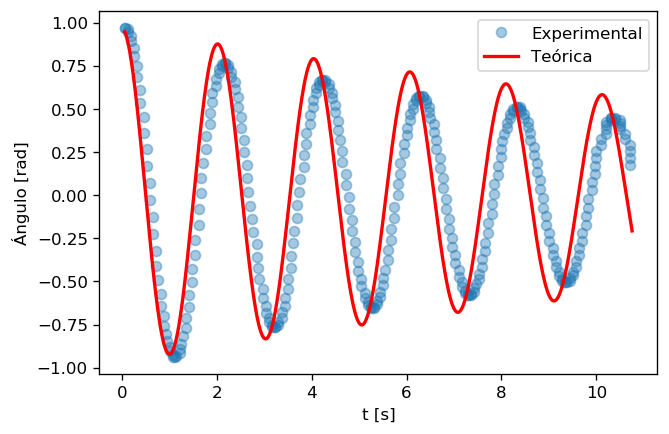

In [33]:
plt.figure(dpi=120)
plt.figure(dpi=120)
k1 = data2.t < 0.4*data2.t.max()
k2 = tiempo_modelo < 0.4*data2.t.max()
plt.plot(data2.t[k1], data2.angulo[k1], 'o', label='Experimental', alpha=0.4)
plt.plot(tiempo_modelo[k2], angulo_modelo[k2],  'r', lw=2, label='Teórica')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

#### Oscilaciones para ángulos grandes ($\sim 80^{\circ}$):

In [35]:
data3=pd.read_csv(caso[3], error_bad_lines=False)
data3['angulo']  -= data3['angulo'].mean()
data3

,t,angulo
0,0.0000,1.343731
1,0.0001,1.342689
2,0.0660,1.330843
3,0.0661,1.309923
4,0.1320,1.279734
...,...,...
878,28.9000,0.095753
879,29.0000,0.074110
880,29.0000,0.050850
881,29.1000,0.026834


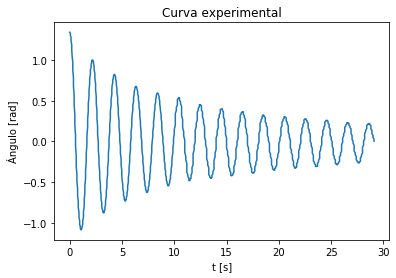

In [36]:
plt.plot(data3.t,data3.angulo)
#plt.plot(data2.t,data2.angulo)
plt.title('Curva experimental')
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

Se seleccionan los tiempos en los que se alcanzan amplitudes máximas, obteniendo:

In [41]:
modelo3 = peaks_finder(data3)

In [42]:
T1 = 2*np.mean(np.diff(modelo3[0]))
print(T, T1)

2.0248 2.039047619047619


Como se mencionó, la solución para grandes oscilaciones involucra integrales elípticas de primera especie. La solución para el periodo es de la forma 

\begin{equation}
T(\theta)=T_{0}\left[\sum_{n=0}^{\infty}\left(\frac{(2 n) !}{2^{2 n}(n !)^{2}}\right)^{2} \sin ^{2 n}\left(\frac{\theta}{2}\right)\right]= T_{0}\left[1+\left(\frac{1}{2}\right)^{2} \sin ^{2} \frac{\theta}{2}+\left(\frac{1 \cdot 3}{2 \cdot 4}\right)^{2} \sin ^{4} \frac{\theta}{2}+\left(\frac{1 \cdot 3 \cdot 5}{2 \cdot 4 \cdot 6}\right)^{2} \sin ^{6} \frac{\theta}{2}+\ldots\right]
\end{equation}

No obstante, para el ángulo considerado ($1.31 [rad]\approx 75^{\circ}$) basta con una aproximación a primer orden ($n=1$), lo que lleva a obtener

\begin{equation}
T \approx T_{0}\left(1+\frac{1}{4}\sin^2\frac{\theta}{2}\right)
\end{equation}

Basado en esto, el periodo teórico obtenido es

In [43]:
T1teo=T*(1 + 0.25*(np.sin(1.314853/2)**2))
print(T1teo)

2.213825680085648


Que presenta un error relativo porcentual

In [44]:
Err=100*(T1teo-T1)/T1teo
print(Err,'%')

7.8948429684521235 %


### Conclusiones:

* En primer lugar, todos los casos realizados responden a un movimiento oscilatorio amortiguado, esto se debe al movimiento relativo de la masa colgante con el aire circundante. Ya que la fuerza de rozamiento es proporcional a la velocidad tangencial instantanea, es de esperarse que a mayor amplitud inicial, mayor sea la atenuación (más evidente también) ya que la velocidad máxima es dependiente de la amplitud inicial. 

* Para todos los casos el movimiento se atenúa de una forma exponencial modulando la amplitud, tal y como lo predice el modelo teórico. 

* En caso de querer estudiar el caso más aproximado a oscilaciones libres requeriría estudiar un bajo número de oscilaciones con una amplitud pequeña, allí se obtendrá una función sinusoidal y no serán completamente apreciables los efectos de la atenuación exponencial.

* El caso de grandes oscilaciones que se estudió no permitió realizar un análisis completamente concluyente de la aplicación de la solución en series.

* Si bien la extracción de datos en el programa tracker resulta delicado y es fácil introducir errores, los casos analizados son una buena experiencia para verificar el modelo teórico estudiado. 

### Referencias:

* Marion, Jerry B. (1996). Dinámica clásica de las partículas y sistemas. Barcelona: Ed. Reverté.
* David Alejandro Miranda Mercado.  (2020, junio 29). Laboratorio de Física 3, Proyecto 2: Péndulo Simple Amortiguado [Archivo de video]. Recuperado de: https://www.youtube.com/watch?v=-kQheIGBKB0
* David Alejandro Miranda Mercado. (2020, julio 8). Laboratorio de Física 3, Proyecto 2: Péndulo Simple Amortiguado, Análisis de Datos [Archivo de video]. Recuperado de: https://www.youtube.com/watch?v=Khrhk-4LTJ0
